<a href="https://colab.research.google.com/github/usama879/creditcardfraudproject/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Environment Set Up

In [1]:
!pip install pandas scikit-learn numpy matplotlib

#2.Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


print("Environment setup complete all the Libraries loaded successfully.")

Environment setup complete all the Libraries loaded successfully.


#3.Configure GUI Framework

We have selected **Flask** as our GUI framework.

#4.Dataset Exploration


We explored several publicly available cybersecurity and fraud detection datasets, including:

- NSL-KDD (Network Intrusion)
- CICIDS2017 (Network Traffic)
- Credit Card Fraud (Kaggle)
- Synthetic Transactional Fraud (Sparkov + Faker)

After evaluating relevance, size, feature diversity, and suitability for real-time fraud detection, we selected the **Credit Card Fraud Detection** dataset generated using Sparkov and Faker libraries.

**Dataset Summary:**
- Total records: 1,852,394
- Fields: 22
- Target: `is_fraud` (binary classification)
- Time range: Jan 2019 – Dec 2020
- Includes customer details, merchant info, geolocation, and transaction history

This dataset provides a rich base for training, evaluating, and deploying machine learning models for fraud prediction.

#5.Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/creditCardFraud.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully")

Mounted at /content/drive
Dataset loaded successfully


In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1852394, 22)


In [5]:
print("\nFirst 5 Rows:")
display(df.head())

print("\nLast 5 Rows:")
display(df.tail())


First 5 Rows:


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



Last 5 Rows:


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


#6.Data Pre-Processing

##6.1 Check All Column Data Types

In [ ]:
column_dtypes = df.dtypes.to_frame(name='DataType')
column_dtypes.reset_index(inplace=True)
column_dtypes.columns = ['Column', 'DataType']
display(column_dtypes)

,Column,DataType
0,trans_date_trans_time,object
1,cc_num,int64
2,merchant,object
3,category,object
4,amt,float64
5,first,object
6,last,object
7,gender,object
8,street,object
9,city,object


##6.2 Convert Transaction Time to Date Features

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month.astype(str).str.zfill(2)
df['day'] = df['trans_date_trans_time'].dt.day.astype(str).str.zfill(2)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df.drop('trans_date_trans_time', axis=1, inplace=True)
print(df[['year', 'month', 'day', 'hour', 'minute']].head())


   year month day  hour  minute
0  2019    01  01     0       0
1  2019    01  01     0       0
2  2019    01  01     0       0
3  2019    01  01     0       1
4  2019    01  01     0       3


##6.3 Convert 'dob' to datetime and calculate age

In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
def calculate_age(born):
    if pd.isnull(born):
        return None
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)
print(df[['dob', 'age']].head())


         dob  age
0 1988-03-09   37
1 1978-06-21   47
2 1962-01-19   63
3 1967-01-12   58
4 1986-03-28   39


##6.4 Check Missing Values

In [ ]:
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100
null_table = pd.DataFrame({'Missing Values': null_counts, 'Percent Missing': null_percent})
null_table = null_table[null_table['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
null_table.reset_index(inplace=True)
null_table.columns = ['Column', 'Missing Values', 'Percent Missing']
null_table

,Column,Missing Values,Percent Missing


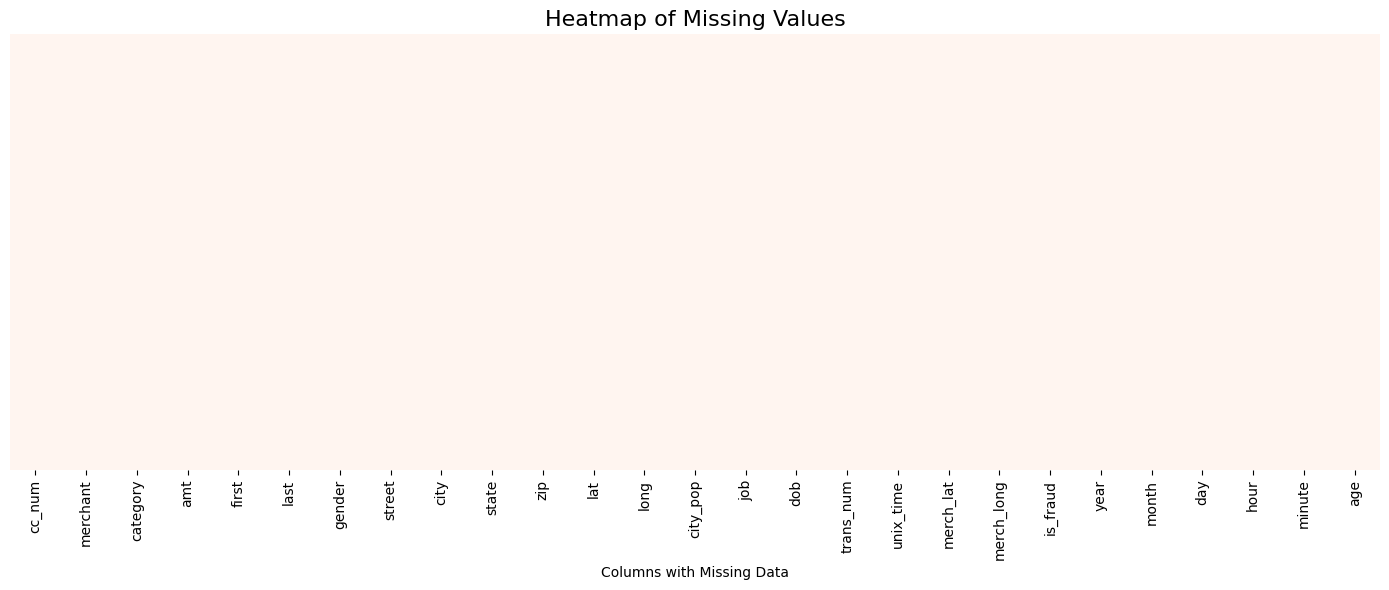

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="Reds")
plt.title("Heatmap of Missing Values", fontsize=16)
plt.xlabel("Columns with Missing Data")
plt.tight_layout()
plt.show()

##6.5 Check Duplicate Data

             Type    Count
0  Duplicate Rows        0
1     Unique Rows  1852394


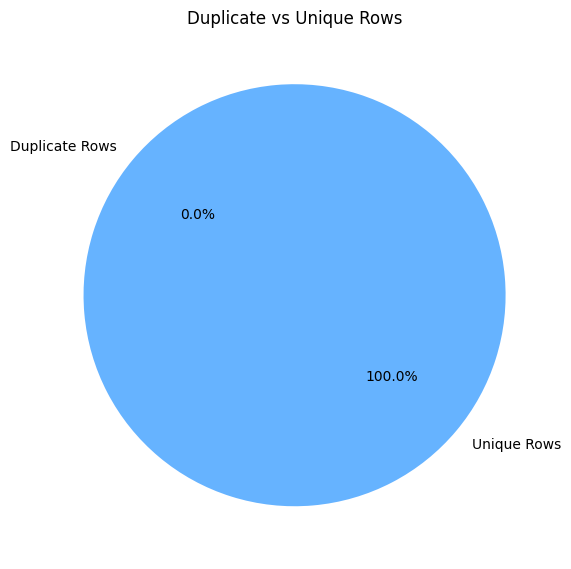

In [ ]:
total_duplicates = df.duplicated().sum()
non_duplicates = len(df) - total_duplicates
duplicate_table = pd.DataFrame({
    'Type': ['Duplicate Rows', 'Unique Rows'],
    'Count': [total_duplicates, non_duplicates]
})
print(duplicate_table)

plt.figure(figsize=(6, 6))
plt.pie([total_duplicates, non_duplicates],
        labels=['Duplicate Rows', 'Unique Rows'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title("Duplicate vs Unique Rows")
plt.tight_layout()
plt.show()


##6.6 Binary Encoding of 'gender' **Column**

In [ ]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
print("Gender column successfully encoded (F = 0, M = 1)")
print(df['gender'].value_counts())

Gender column successfully encoded (F = 0, M = 1)
gender
0    1014749
1     837645
Name: count, dtype: int64


##6.7 One-Hot Encoding of Multi-Class Categorical Columns

In [ ]:
one_hot_columns = ['category']
encoded_df = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns, drop_first=True)
encoded_df = encoded_df.astype(int)
df = pd.concat([df, encoded_df], axis=1)

print("One-Hot Encoding completed for:", one_hot_columns)
print("New total columns in the dataset:", df.shape[1])

encoded_cols = [col for col in df.columns if col.startswith('category_')]
print("Sample encoded columns:", encoded_cols[:10])



One-Hot Encoding completed for: ['category']
New total columns in the dataset: 40
Sample encoded columns: ['category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care']


##6.8 Normalization of Numerical Features

In [ ]:
numerical_columns = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df[numerical_columns].head())

        amt  city_pop       lat      long  merch_lat  merch_long
0  0.000137  0.001194  0.343968  0.864638   0.350307    0.848603
1  0.003670  0.000043  0.618450  0.485682   0.621490    0.486209
2  0.007569  0.001421  0.474727  0.546553   0.497563    0.546698
3  0.001520  0.000659  0.561509  0.548070   0.577666    0.542621
4  0.001415  0.000026  0.394153  0.882190   0.405248    0.882857


#7.Feature Selection to Choose Influential Features

In [ ]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_numeric = X.select_dtypes(include=['int64', 'float64'])
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_numeric, y)

feature_importances = rf_model.feature_importances_
features = X_numeric.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


##7.1 Top 15 Important Featues

In [ ]:
print("Top 15 Most Influential Features\n")
print(importance_df.head(15))

Top 15 Most Influential Features

                   Feature  Importance
1                      amt    0.492895
7                unix_time    0.074525
14    category_grocery_pos    0.062546
9               merch_long    0.061658
8                merch_lat    0.060978
10                     age    0.036959
6                 city_pop    0.034017
0                   cc_num    0.026582
3                      zip    0.026155
4                      lat    0.026153
5                     long    0.025066
12  category_gas_transport    0.016417
2                   gender    0.011107
19       category_misc_pos    0.010248
23         category_travel    0.006911
